In [67]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt
from IPython.display import display, HTML
# allow side by side display
CSS = """
.output {
    display: flex;
    flex-flow: row wrap;
}
"""

HTML('<style>{}</style>'.format(CSS))

In [153]:
with open("data/train.csv", 'rb') as f:
    train = pd.read_csv(f)

In [154]:
display(train)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [155]:
# use PassengerId as an index and drop it because it doesn't contain any informations
train.set_index('PassengerId',inplace = True, drop=True)

In [156]:
# show the type and proportion of known data for each column
display(train.dtypes)
display(train.count()/train.shape[0])

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

Survived    1.000000
Pclass      1.000000
Name        1.000000
Sex         1.000000
Age         0.801347
SibSp       1.000000
Parch       1.000000
Ticket      1.000000
Fare        1.000000
Cabin       0.228956
Embarked    0.997755
dtype: float64

In [72]:
victims = train[train.Survived == 1]
survivors = train[train.Survived == 0]


In [123]:
# show classes distribution according a specific feature
def plot_hist(feature,default, bins =20):        
    vf = np.array(victims[feature].fillna(default))
    sf = np.array(survivors[feature].fillna(default))
    plt.hist([vf,sf], label=['victims','survivors'], bins=bins)
    plt.title(feature)
    plt.legend()
    plt.show()

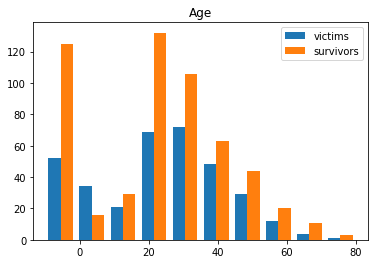

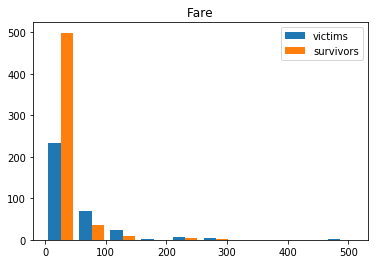

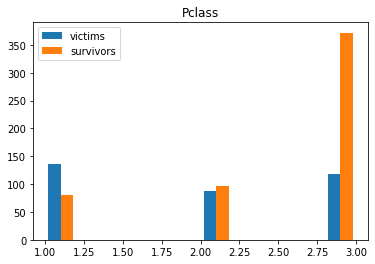

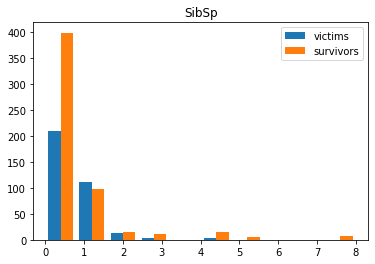

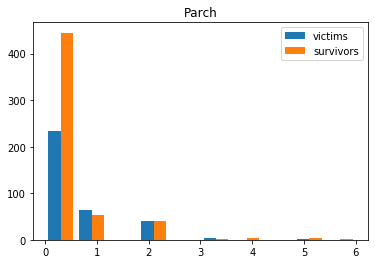

In [124]:
plot_hist('Age', -10, 10)
plot_hist('Fare', -10, 10)
plot_hist('Pclass', -5, 10)
plot_hist('SibSp', -5, 10)
plot_hist('Parch', -5, 10)
# 
# we can see that not nowing the age of the person is an information on its own 

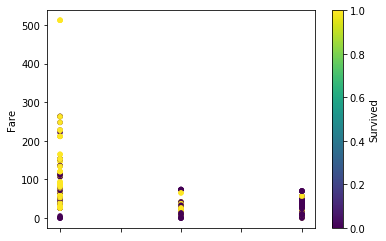

In [93]:
ax2 = train.plot.scatter(x='Pclass',y='Fare',c='Survived',colormap='viridis' )

In [139]:
# compute cross validation by training the model on 4/5 of the data and testing it on the other 1/5
def compute_score(clf,X,y):
    cross_val = cross_val_score(clf,X,y,cv=5 )
    return cross_val.mean()


In [169]:
def extract_train_score(name,func,train,clf):
    y,x = func(train)
    score = compute_score(clf,x,y)
    print("Score for %s model : %s"%(name,score))

In [177]:
# at first we only keep one feature:  the Pclass
def parse_model_pclass(df, show=False):
    x = df.copy()
    target = x.Survived
    class_dummies = pd.get_dummies(x['Pclass'], prefix="Pclass")
    x = x.join(class_dummies)
    to_drop =['Survived','Pclass','Fare', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked']
    x = x.drop(to_drop, axis=1)
    if show:
        display(x)
    return target, x

In [180]:
# adding the sex to the model 
def parse_model_pclass_sex(df,show=False):
    x = df.copy()
    target = x.Survived
    class_dummies = pd.get_dummies(x['Pclass'], prefix="Pclass")
    x = x.join(class_dummies)
    sex_dummies = pd.get_dummies(x['Sex'], prefix="Sex")
    x = x.join(sex_dummies)
    to_drop =['Survived','Pclass','Fare', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked']
    x = x.drop(to_drop, axis=1)
    if show:
        display(x)
    return target, x

In [199]:
# adding the age to the model 
def parse_model_pclass_sex_age(df,show=False):
    x = df.copy()
    target = x.Survived
    class_dummies = pd.get_dummies(x['Pclass'], prefix="Pclass")
    x = x.join(class_dummies)
    sex_dummies = pd.get_dummies(x['Sex'], prefix="Sex")
    x = x.join(sex_dummies)
    x['Age'] = x.Age.fillna(-10)# improove significantly the reselt than the median or the mean
    to_drop =['Survived','Pclass','Fare', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked']
    x = x.drop(to_drop, axis=1)
    if show:
        display(x)
    return target, x

In [237]:
# adding the age to the model 
def parse_model_pclass_sex_custom_age(df,show=False):
    x = df.copy()
    target = x.Survived
    class_dummies = pd.get_dummies(x['Pclass'], prefix="Pclass")
    x = x.join(class_dummies)
    sex_dummies = pd.get_dummies(x['Sex'], prefix="Sex")
    x = x.join(sex_dummies)
    #x["unknown_age"] = x.Age.isna()
    x["is_child"] =  x.Age < 8
    x["is_young_aduld"] = x.Age.map(lambda x : x>15 or x <30)
    x['Age'] = x.Age.fillna(80)# improove significantly the reselt than the median or the mean

    to_drop =['Survived','Pclass','Fare', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked']
    x = x.drop(to_drop, axis=1)
    if show:
        display(x)
    return target, x

In [238]:
parse_model_pclass_sex_custom_age(train,True)

,Age,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,is_child,is_young_aduld
PassengerId,,,,,,,,
1,22.0,0,0,1,0,1,False,True
2,38.0,1,0,0,1,0,False,True
3,26.0,0,0,1,1,0,False,True
4,35.0,1,0,0,1,0,False,True
5,35.0,0,0,1,0,1,False,True
...,...,...,...,...,...,...,...,...
887,27.0,0,1,0,0,1,False,True
888,19.0,1,0,0,1,0,False,True
889,80.0,0,0,1,1,0,False,False


(PassengerId
 1      0
 2      1
 3      1
 4      1
 5      0
       ..
 887    0
 888    1
 889    0
 890    1
 891    0
 Name: Survived, Length: 891, dtype: int64,
               Age  Pclass_1  Pclass_2  Pclass_3  Sex_female  Sex_male  \
 PassengerId                                                             
 1            22.0         0         0         1           0         1   
 2            38.0         1         0         0           1         0   
 3            26.0         0         0         1           1         0   
 4            35.0         1         0         0           1         0   
 5            35.0         0         0         1           0         1   
 ...           ...       ...       ...       ...         ...       ...   
 887          27.0         0         1         0           0         1   
 888          19.0         1         0         0           1         0   
 889          80.0         0         0         1           1         0   
 890          26.0 

In [258]:
rf = RandomForestClassifier(n_estimators=100,max_depth=None, n_jobs=-1)
help(RandomForestClassifier)

Help on class RandomForestClassifier in module sklearn.ensemble.forest:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators='warn', criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None)
 |  
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is always the same as the original
 |  input sample size but the samples are drawn with replacement if
 |  `bootstrap=True` (default).
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters
 |  ----------
 |  n_estimators

In [260]:
extract_train_score("plcass",parse_model_pclass, train, rf)
extract_train_score("pclass_sex",parse_model_pclass_sex,train,rf)
extract_train_score("pclass_sex_age",parse_model_pclass_sex_age,train,rf)
extract_train_score("pclass_sex_custom_age",parse_model_pclass_sex_custom_age,train,rf)


Score for plcass model : 0.6657489023107065
Score for pclass_sex model : 0.7733072037001376
Score for pclass_sex_age model : 0.8003115838182104
Score for pclass_sex_custom_age model : 0.8025589166841325
